In [26]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [27]:
with open('../data/clean/trulia.csv', 'r') as file:
    df = pd.read_csv(file)

In [46]:
# df.dropna().to_csv('../data/clean/trulia.csv', index=False)

In [47]:
df.head(10)

,Unnamed: 0,Address,County,Zip,price,Listing Url,Borough
0,0,"2600 Netherland Ave Bronx, NY 10463",Bronx,10463,2245.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
1,1,"2600 Netherland Ave Bronx, NY 10463",Bronx,10463,2600.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
2,2,"2600 Netherland Ave Bronx, NY 10463",Bronx,10463,3675.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
3,3,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,1581.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
4,4,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,1904.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
5,5,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2053.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
6,6,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2399.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
7,7,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2524.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
8,8,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2699.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
9,9,"562 E 191st St Bronx, NY 10458",Bronx,10458,3000.0,https://www.trulia.com/c/ny/bronx/562-east-191...,Bronx


In [30]:
df.shape

(1044, 7)

/var/folders/ht/q4d_vppn3x5d3_p7bs499mdh0000gn/T/ipykernel_22034/1350559344.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_rent_by_boro = df.groupby(["Borough"]).mean()["price"]


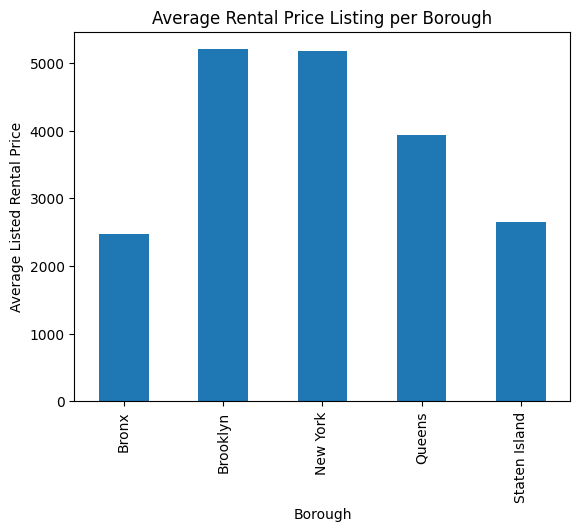

In [31]:
# Median rent amount per borough 
# fig = plt.figure()
mean_rent_by_boro = df.groupby(["Borough"]).mean()["price"]
plot = mean_rent_by_boro.plot(kind='bar', x = "Borough", ylabel = "Average Listed Rental Price", title = "Average Rental Price Listing per Borough")

plot.figure.savefig("./mean_rent_by_boro.png")

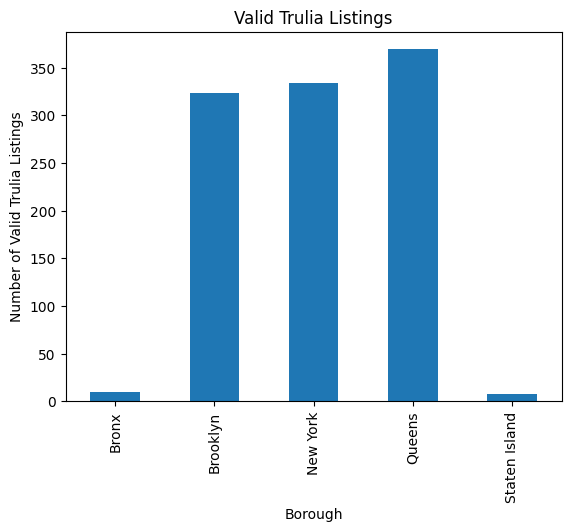

In [32]:
# Distrubtion of Listings per Borough

num_listings_by_boro = df.groupby(["Borough"]).count()["Listing Url"]
plot = num_listings_by_boro.plot(kind='bar', x = "Borough", ylabel = "Number of Valid Trulia Listings", title = "Valid Trulia Listings")

plot.figure.savefig("./num_listings_by_boro.png")

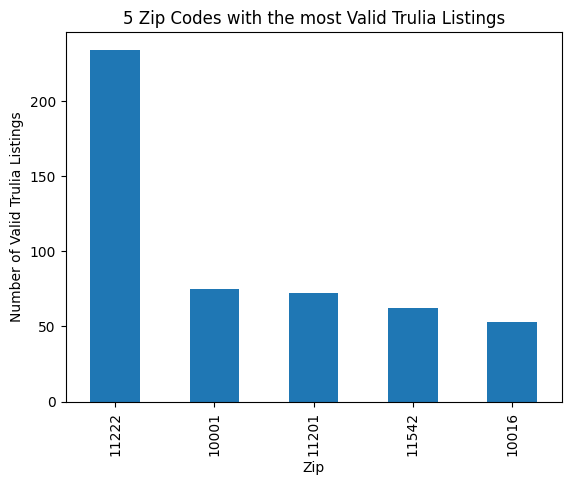

In [33]:
# Top 5 Zip Codes with the Most amount of listings
num_listings_by_zip = df.groupby(["Zip"]).count()["Listing Url"]
num_listings_by_zip = num_listings_by_zip.sort_values(ascending=False).head(5)

plot = num_listings_by_zip.plot(kind='bar', x = "Zip Code", ylabel = "Number of Valid Trulia Listings", title = "5 Zip Codes with the most Valid Trulia Listings")

plot.figure.savefig("./num_listings_by_zip.png")

/var/folders/ht/q4d_vppn3x5d3_p7bs499mdh0000gn/T/ipykernel_22034/1702550664.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_rent_by_zip = df.groupby(["Zip"]).mean()["price"].sort_values(ascending=False).head(5)


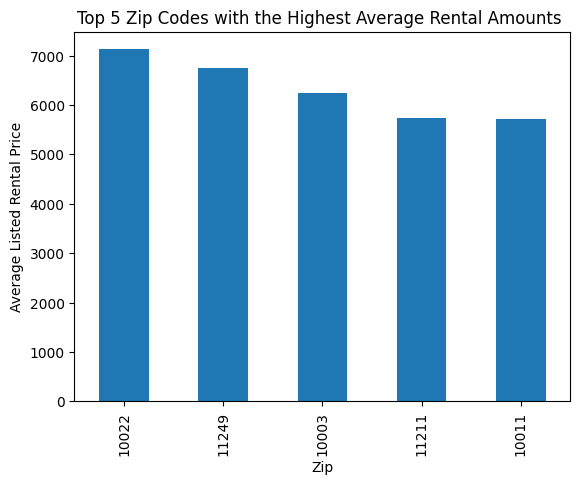

In [34]:
# Zip Codes with the highest average rental amounts 

mean_rent_by_zip = df.groupby(["Zip"]).mean()["price"].sort_values(ascending=False).head(5)
plot = mean_rent_by_zip.plot(kind='bar', x = "Borough", ylabel = "Average Listed Rental Price", 
                               title = "Top 5 Zip Codes with the Highest Average Rental Amounts ")

plot.figure.savefig("./mean_rent_by_zip.png")

In [35]:
## TODO: Explore the following :
    # Box plot for avg rent for each borough 
    # Try graphing different dataframes together (e.g.: Zillow data + Trulia, Apartments.com + Trulia, AirBnB vs Trulia)

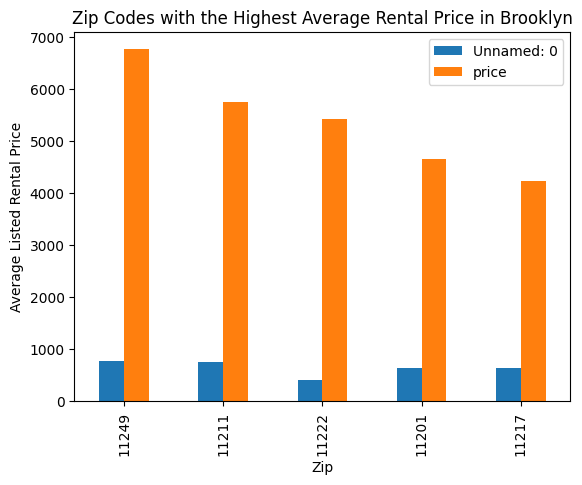

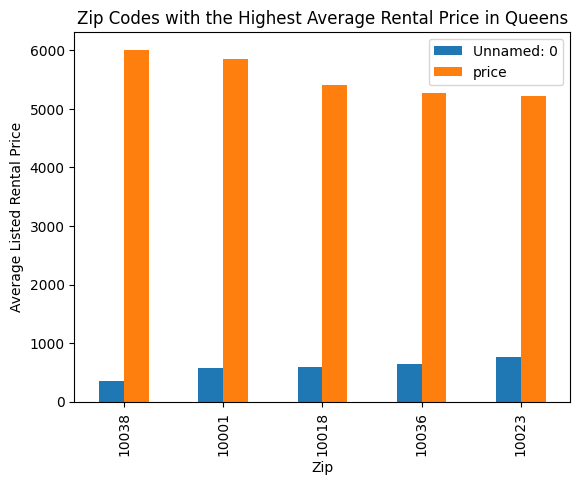

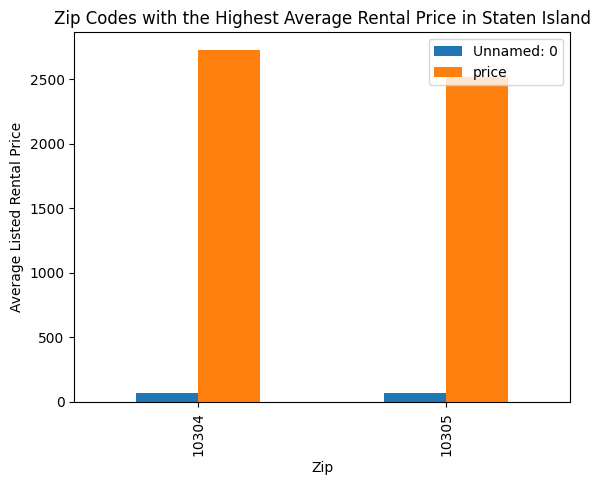

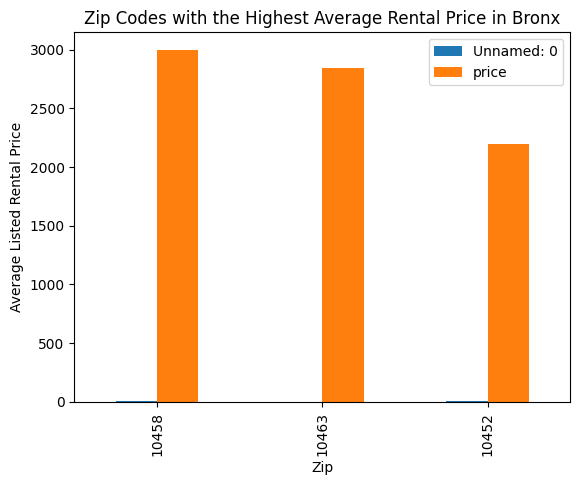

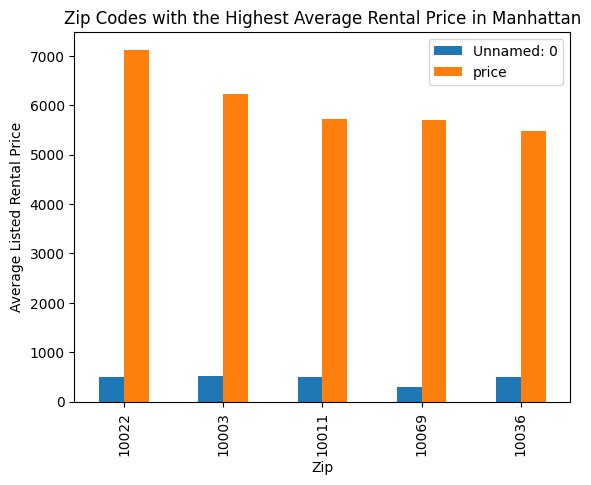

In [36]:
# Average rent price per zip code per borough

brooklyn = df.groupby(["Borough"]).get_group("Brooklyn").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
manhattan = df.groupby(["Borough"]).get_group("New York").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
queens = df.groupby(["Borough"]).get_group("Queens").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
staten_island = df.groupby(["Borough"]).get_group("Staten Island").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
bronx = df.groupby(["Borough"]).get_group("Bronx").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)

boros = [(brooklyn, "Brooklyn"), (queens, "Queens"), (staten_island, "Staten Island"), (bronx, "Bronx"), (manhattan, "Manhattan")]

for b, b_title in boros: 
    plot = b.plot(kind = "bar", title = "Zip Codes with the Highest Average Rental Price in "+ b_title, ylabel = "Average Listed Rental Price",)
    plot.figure.savefig(b_title + ".png")



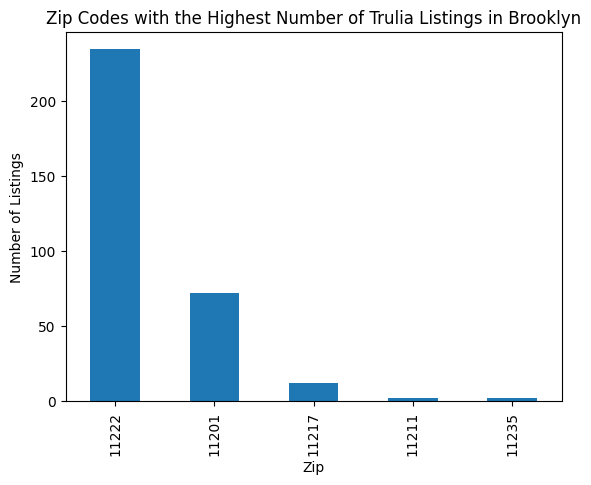

In [37]:
# Distribution of Trulia Listings per Borough per Zip code

brooklyn = df.groupby(["Borough"]).get_group("Brooklyn").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
manhattan = df.groupby(["Borough"]).get_group("New York").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
queens = df.groupby(["Borough"]).get_group("Queens").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
staten_island = df.groupby(["Borough"]).get_group("Staten Island").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
bronx = df.groupby(["Borough"]).get_group("Bronx").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)

brooklyn_plot = brooklyn["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Brooklyn", ylabel = "Number of Listings")

brooklyn_plot.figure.savefig("./brooklyn_plot_mean_rent_by_zip.png")

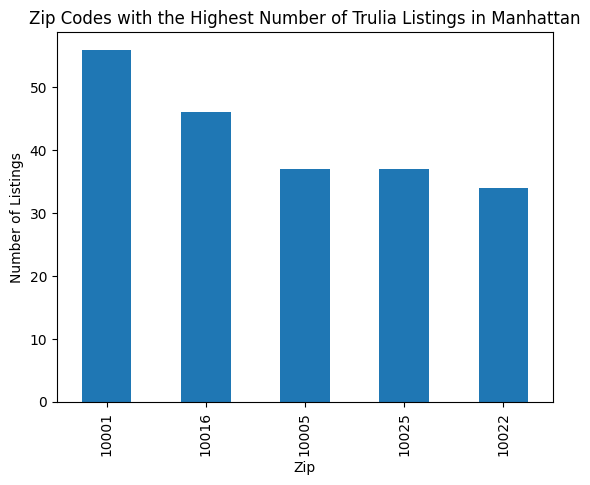

In [38]:
manhattan_plot = manhattan["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Manhattan", ylabel = "Number of Listings")

manhattan_plot.figure.savefig("./manhattan_plot_mean_rent_by_zip.png")

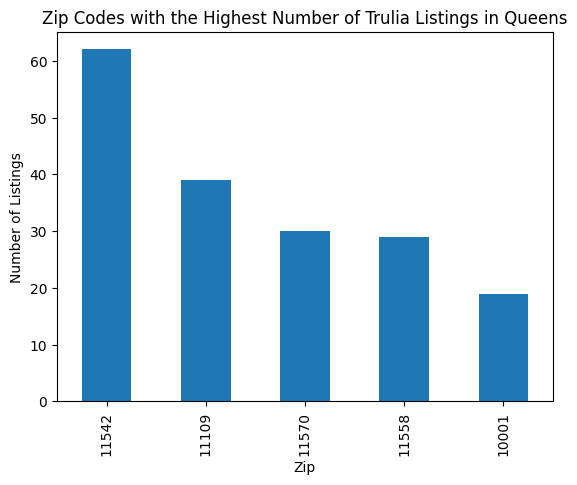

In [39]:
queens_plot = queens["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Queens", ylabel = "Number of Listings")


queens_plot.figure.savefig("./queens_plot_mean_rent_by_zip.png")

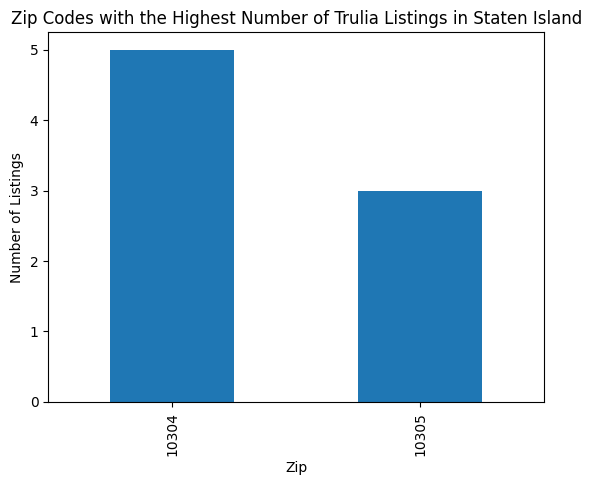

In [40]:
staten_island_plot = staten_island["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Staten Island", ylabel = "Number of Listings")

staten_island_plot.figure.savefig("./staten_island_plot_mean_rent_by_zip.png")

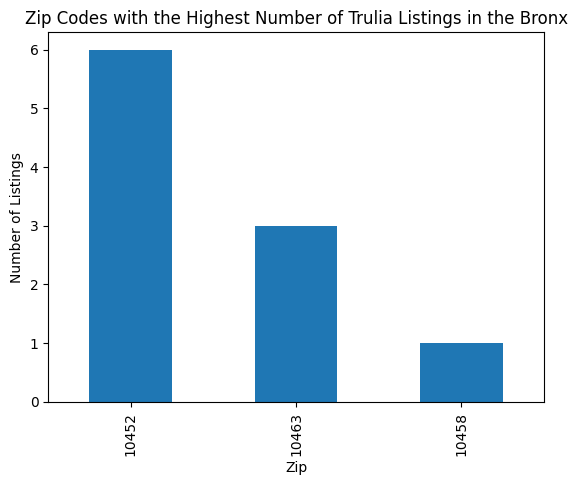

In [41]:
bronx_plot = bronx["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in the Bronx", ylabel = "Number of Listings")

bronx_plot.figure.savefig("./bronx_plot_mean_rent_by_zip.png")



<AxesSubplot: xlabel='Borough', ylabel='price'>

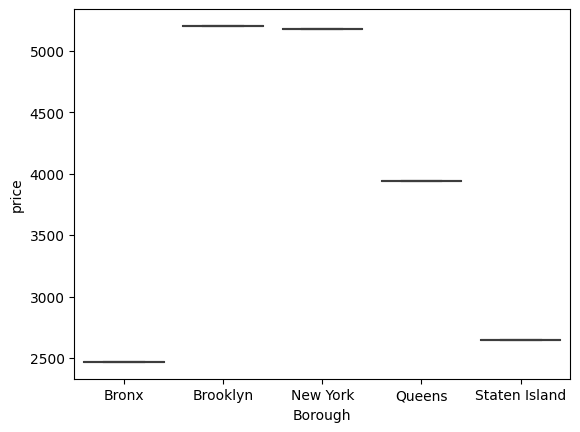

In [42]:
# HELP! This seems wrong...

sns.boxplot(data = mean_rent_by_boro.reset_index(), x="Borough", y="price")

In [43]:
df["price"].sort_values(ascending = False).dropna()

281    13765.0
280    13590.0
187    13132.0
534    12952.0
320    12895.0
        ...   
428     1700.0
582     1675.0
508     1650.0
581     1625.0
3       1581.0
Name: price, Length: 1044, dtype: float64